In [ ]:
# IMPORTANDO AS BIBLIOTECAS

import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr  # biblioteca pandas datareader
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [ ]:
## Dar cor para os gráficos: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
from pylab import mpl, plt # importando o pacote

plt.style.use('seaborn') # mudando a cor da paleta dos gráficos
mpl.rcParams['font.family'] = 'serif' # mudando a fonte dos gráficos

<ipython-input-54-81bbd8727fb6>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # mudando a cor da paleta dos gráficos


In [ ]:
# CALCULANDO O BETA

# O beta é um indicador que mede a sensibilidade de um ativo em relação ao comportamento de uma carteira que represente o mercado.
# O tempo ideal para calcular um beta é mais ou menos de 5 anos

# Definindo a carteira
tickers = ['AMAR3.SA', 'UNIP6.SA', 'JBSS3.SA', 'EMBR3.SA', 'VALE3.SA', 'BBAS3.SA', 'BOVA11.SA', 'CSNA3.SA', 'WEGE3.SA', 'USIM5.SA']

# Criando um DataFrame vazio para armazenar os dados
dataset = pd.DataFrame()

# Obtendo os dados históricos de cada ação e adicionando ao DataFrame
for symbol in tickers:
    dataset[symbol] = yf.download(symbol, start='2015-01-01')['Adj Close']  # começa na data escolhida e vai até o último registro disponível

print(dataset)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

             AMAR3.SA   UNIP6.SA   JBSS3.SA   EMBR3.SA   VALE3.SA   BBAS3.SA  \
Date                                                                           
2015-01-02  60.064339   0.985229   7.803240  23.961100  12.060665   3.797773   
2015-01-05  59.608994   0.943304   7.840220  23.430773  11.879300   3.718966   
2015-01-06  55.924828   0.964267   7.655312  23.006512  12.355378   3.770947   
2015-01-07  56.959705   0.964267   7.869807  22.832952  12.808787   3.936941   
2015-01-08  56.338779   0.964267   7.936377  22.177275  12.944813   3.950355   
...               ...        ...        ...        ...        ...        ...   
2024-05-21   1.890000  50.599998  29.490000  39.500000  65.959999  27.900000   
2024-05-22   1.820000  50.299999  29.350000  38.689999  65.440002  27.500000   
2024-05-23   1.760000  50.689999  29.480000  37.970001  65.050003  26.940001   
2024-05-24   1.770000  50.500000  29.360001  37.680000  65.080002  27.080000   
2024-05-27   1.770000  50.700001  28.740

In [ ]:
# Renomeando as colunas
dataset.columns = ['AMAR', 'UNIP', 'JBSS', 'EMBR', 'VALE', 'BBAS', 'BOVA', 'CSNA', 'WEGE', 'USIM5']

# Exibindo o DataFrame
dataset

,AMAR,UNIP,JBSS,EMBR,VALE,BBAS,BOVA,CSNA,WEGE,USIM5
Date,,,,,,,,,,
2015-01-02,60.064339,0.985229,7.803240,23.961100,12.060665,3.797773,47.259998,3.224160,5.028517,3.732291
2015-01-05,59.608994,0.943304,7.840220,23.430773,11.879300,3.718966,46.320000,3.065491,5.062803,3.506328
2015-01-06,55.924828,0.964267,7.655312,23.006512,12.355378,3.770947,46.580002,3.313015,4.987701,3.677748
2015-01-07,56.959705,0.964267,7.869807,22.832952,12.808787,3.936941,48.150002,3.674782,4.930562,3.895920
2015-01-08,56.338779,0.964267,7.936377,22.177275,12.944813,3.950355,48.509998,3.554193,5.013823,3.701123
...,...,...,...,...,...,...,...,...,...,...
2024-05-21,1.890000,50.599998,29.490000,39.500000,65.959999,27.900000,123.699997,13.590000,39.759998,8.290000
2024-05-22,1.820000,50.299999,29.350000,38.689999,65.440002,27.500000,122.070000,13.320000,39.279999,8.170000
2024-05-23,1.760000,50.689999,29.480000,37.970001,65.050003,26.940001,121.099998,13.100000,39.029999,8.030000


#### Existem poucos valores faltantes, somente para a BOVA, não sendo um problema para o avanço da análise do CAPM

In [ ]:
# Verificando os preços faltantes das ações
dataset.isna().sum()

AMAR      0
UNIP      0
JBSS      0
EMBR      0
VALE      0
BBAS      0
BOVA     27
CSNA      0
WEGE      0
USIM5     0
dtype: int64

In [ ]:
# Removendo a coluna "date" pq não esta no dataframe da carteira
dataset.drop(labels = ['Date'], axis = 1, inplace = True)
print(dataset.columns)

# diz que não existe essa coluna no dataframe

# **Normalizando os preços**

O que é a normalização? você pega todos os preços e relaciona ao primeiro preços de cada uma das colunas. Isso é feito para retirar o "efeito tamanho", pois os preços das ações são muito diferentes.

In [ ]:
dataset_normalizado = dataset.copy()
for i in dataset.columns:
    if i != 'Date':  # Evitar normalizar a coluna 'Date'
        dataset_normalizado[i] = dataset[i] / dataset[i][0]
print(dataset_normalizado)

                AMAR       UNIP      JBSS      EMBR      VALE      BBAS  \
Date                                                                      
2015-01-02  1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
2015-01-05  0.992419   0.957447  1.004739  0.977867  0.984962  0.979249   
2015-01-06  0.931082   0.978723  0.981043  0.960161  1.024436  0.992936   
2015-01-07  0.948312   0.978723  1.008531  0.952918  1.062030  1.036645   
2015-01-08  0.937974   0.978723  1.017062  0.925553  1.073308  1.040177   
...              ...        ...       ...       ...       ...       ...   
2024-05-21  0.031466  51.358628  3.779199  1.648505  5.469018  7.346411   
2024-05-22  0.030301  51.054131  3.761258  1.614700  5.425903  7.241086   
2024-05-23  0.029302  51.449978  3.777918  1.584652  5.393567  7.093631   
2024-05-24  0.029468  51.257131  3.762540  1.572549  5.396054  7.130495   
2024-05-27  0.029468  51.460130  3.683085  1.566289  5.382788  7.156826   

                BOVA    

In [ ]:
# Calculando retorno esperado diários das ações, com os preços normalizados
dataset_taxa_retorno = (dataset_normalizado / dataset_normalizado.shift(1)) - 1
dataset_taxa_retorno

,AMAR,UNIP,JBSS,EMBR,VALE,BBAS,BOVA,CSNA,WEGE,USIM5
Date,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.007581,-0.042553,0.004739,-0.022133,-0.015038,-0.020751,-0.019890,-0.049213,0.006818,-0.060543
2015-01-06,-0.061806,0.022222,-0.023585,-0.018107,0.040076,0.013977,0.005613,0.080745,-0.014834,0.048889
2015-01-07,0.018505,0.000000,0.028019,-0.007544,0.036697,0.044019,0.033705,0.109196,-0.011456,0.059322
2015-01-08,-0.010901,0.000000,0.008459,-0.028716,0.010620,0.003407,0.007477,-0.032815,0.016887,-0.050000
...,...,...,...,...,...,...,...,...,...,...
2024-05-21,0.105263,-0.004329,0.003061,0.015946,-0.002872,-0.000716,-0.003384,0.008909,-0.002258,0.017178
2024-05-22,-0.037037,-0.005929,-0.004747,-0.020506,-0.007884,-0.014337,-0.013177,-0.019868,-0.012072,-0.014475
2024-05-23,-0.032967,0.007753,0.004429,-0.018609,-0.005960,-0.020364,-0.007946,-0.016516,-0.006365,-0.017136


In [ ]:
dataset_taxa_retorno.fillna(0, inplace=True)  # substituindo os NaN das primeiras linhas por zeros.
dataset_taxa_retorno.head()

,AMAR,UNIP,JBSS,EMBR,VALE,BBAS,BOVA,CSNA,WEGE,USIM5
Date,,,,,,,,,,
2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.007581,-0.042553,0.004739,-0.022133,-0.015038,-0.020751,-0.019890,-0.049213,0.006818,-0.060543
2015-01-06,-0.061806,0.022222,-0.023585,-0.018107,0.040076,0.013977,0.005613,0.080745,-0.014834,0.048889
2015-01-07,0.018505,0.000000,0.028019,-0.007544,0.036697,0.044019,0.033705,0.109196,-0.011456,0.059322
2015-01-08,-0.010901,0.000000,0.008459,-0.028716,0.010620,0.003407,0.007477,-0.032815,0.016887,-0.050000


In [ ]:
# Transformando o retorno esperado DIÁRIO em um retorno esperado ANUAL

# Multiplica a média da taxa de retorno diária por 246 (o número de dias úteis em um ano).
# Isso anualiza a média da taxa de retorno diária, transformando-a em uma média da taxa de retorno anual.

dataset_taxa_retorno.mean() * 246

AMAR    -0.172036
UNIP     0.499120
JBSS     0.241108
EMBR     0.144708
VALE     0.273987
BBAS     0.292065
BOVA     0.127193
CSNA     0.322052
WEGE     0.269412
USIM5    0.241243
dtype: float64

## **Beta individual de cada ação:**
### Antes de iniciar a análise do modelo CAPM, que tem como objetivo analisar o risco da carteira, os passos abaixo apresentam a possibilidade de cálculo do beta individual de cada ação. Não será replicada a análise de todas ações porque o objetivo aqui é o modelo CAPM.
### O foco é apenas demonstrar que por meio de uma regressão linear simples (método estatístico usado para entender e modelar a relação entre os retornos (ou preços) de dois ativos financeiros.) De modo geral, a regressão linear procura estabelecer uma relação linear entre duas variáveis,  assumindo que existe uma relação aproximadamente linear entre os movimentos dessas duas variáveis ao longo do tempo.

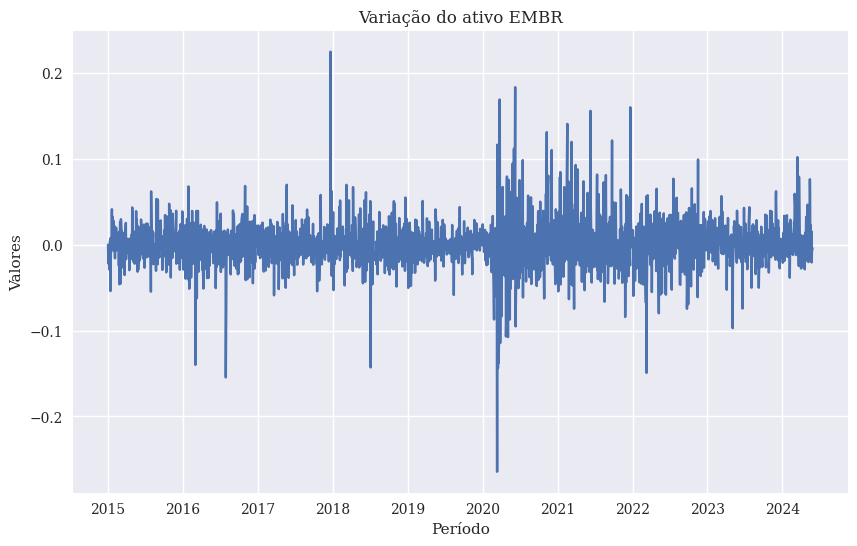

In [ ]:
# Visualizando a variação do ativo 'EMBR' ao longo do tempo para entender sua tendência
plt.figure(figsize=(10, 6))  # Define o tamanho da figura (largura, altura)
plt.plot(dataset_taxa_retorno['EMBR']) # Traça o gráfico da variação do ativo 'EMBR' ao longo do tempo. O eixo x (horizontal) representa o período, enquanto o eixo y (vertical) representa os valores da variação.
plt.title('Variação do ativo EMBR') # Define o título do gráfico
plt.xlabel('Período') # Define o rótulo do eixo x
plt.ylabel('Valores') # Define o rótulo do eixo y
plt.grid(True) # Adiciona grades ao gráfico, o que facilita a leitura e a interpretação dos valores.
plt.show() # Exibe o gráfico na tela.

In [ ]:
# Gráfico de dispersão que mostra a relação entre as variáveis 'BOVA' e 'EMBR'

figura = px.scatter(dataset_taxa_retorno, x = 'BOVA', y = 'EMBR', title = 'BOVA x EMBR')
figura.show()

# Como calcular o beta?

Opção 1) B = covariância(Ri,Rm)/variância(Rm)

Opção 2) MQO

# Resultados do beta:



*   Um ativo com B = 1 é considerado tão volátil quanto o mercado. Isso significa que, em média, ele se move na mesma direção e na mesma proporção que o mercado.
*   Um ativo com B > 1 (agressivo) é considerado mais volátil que o mercado. Isso significa que, em média, ele tende a ter movimentos maiores do que o mercado.
*   Um ativo com B < 1 (defensivo) é considerado menos volátil que o mercado. Isso significa que, em média, ele tende a ter movimentos menores do que o mercado.
*   Um ativo com B = 0 é considerado não relacionado ao mercado. Isso significa que seus retornos são independentes dos movimentos do mercado.

Exemplo 1: B = 1,5. O ativo com beta de 1,5 tem 1,5 vezes mais risco que o mercado.
Exemplo 1: B = 1. O ativo com beta de 1 tem 1o mesmo nível de risco que o mercado.
Exemplo 1: B = 0,5. O ativo com beta de 0,5 tem metade do risco em relação ao mercado.

# Beta pela regressão linear - opção 2

In [ ]:
# Cria uma reta de regressão para entender como os dados se comportam em relação a média geral dos valores. Quando mais longe os dados estivere longe da reta de regressão, maior será o erro de "previsão" naquele momento

# calculando os coeficientes de inclinação (beta) e intercepto (alpha) da regressão linear, e então imprime esses valores, juntamente com o valor de alpha em porcentagem.
# Isso é útil para entender a relação linear entre as variáveis 'BOVA' e 'EMBR' em seu conjunto de dados

## CALCULANDO O BETA POR REGRESSÃO LINEAR - Opção 2
beta, alpha = np.polyfit(x = dataset_taxa_retorno['BOVA'], y = dataset_taxa_retorno['EMBR'], deg = 1)
print('beta:', beta, 'alpha:', alpha, 'alpha (%):', alpha * 100)

beta: 0.7619290406634808 alpha: 0.00019429341380696223 alpha (%): 0.019429341380696224


In [ ]:
# gráfico de dispersão com os dados de 'BOVA' no eixo x e 'EMBR' no eixo y, e adiciona uma linha de regressão linear ao gráfico.
# Isso permite visualizar a relação linear entre as variáveis 'BOVA' e 'EMBR', com a linha de regressão representando a tendência geral dos dados.

figura = px.scatter(dataset_taxa_retorno, x = 'BOVA', y = 'EMBR', title = 'BOVA x EMBR')
figura.add_scatter(x = dataset_taxa_retorno['BOVA'], y = beta * dataset_taxa_retorno['BOVA'] + alpha)
figura.show()

# Beta pela covariância e variância - opção 1

#### A matriz de covariância relaciona dois ativos, então é preciso retirar os outros dados.
### A covariância quando é positiva, indica que as variáveis tendem a aumentar ou diminuir juntas; se negativa, uma variável tende a aumentar quando a outra diminui. Se a covariância é zero, não há relação linear entre as variáveis.

#### Já a matriz de Covariância é uma tabela que na diagonal principal da matriz exibe as variâncias individuais de cada variável, enquanto os valores fora da diagonal mostram as covariâncias entre pares de variáveis diferentes.

In [ ]:
## CALCULANDO O BETA PELA VARIÂNCIA E COVARIÂNCIA - Opção 1 - covariância(Ri,Rm)/variância(Rm)

# Só tenho interesse em BOVA e EMBR, por isso eu "dropo" as outras ações
matriz_covariancia = dataset_taxa_retorno.drop(columns = ['AMAR', 'UNIP', 'JBSS', 'VALE', 'BBAS', 'CSNA', 'WEGE', 'USIM5']).cov() * 246
matriz_covariancia

,EMBR,BOVA
EMBR,0.194779,0.04519
BOVA,0.045190,0.05931


In [ ]:
# Covariância da EMBR e BOVA
cov = matriz_covariancia.iloc[1, 0]   # 1 = na segunda linha e 0 = na primeira coluna
cov

0.04519002421940754

In [ ]:
# Calcula a variância ANUALIZADA dos retornos da coluna 'BOVA' e armazena esse valor na variável variancia
variancia = dataset_taxa_retorno['BOVA'].var() * 246
variancia

0.05931001682263809

In [ ]:
# Calculando o beta da EMBR
betaembr = cov / variancia
betaembr

0.7619290406634808

Perceba que, independentemente do método de cálculo, o valor do beta da EMBR é o mesmo para as duas opções mencionadas:

Opção 1) B = covariância(Ri,Rm)/variância(Rm) = 0.7619290406634808

Opção 2) Regressão linear (MQO) = 0.7619290406634808

# **Modelo CAPM - Capital Asset Princing Model**

Muito usado para avaliação e precificação dos ativos financeiros. O CAPM estabelece a relação entre retorno esperado de um ativo financeiro e seu risco sistêmico, medido pelo coeficiente beta (B).
O modelo estima o retorno esperadi de um ativo financeiro com base em seu risco por meio de 3 componentes:

1) Rf [taxa livre de risco]: é o retorno que se espera obter de um investimento sem risco, como títulos do governo de longo prazo. É a recompensa mínima esperada (o retorno do ativo deve ser pelo menos igual a Rf), como é o caso da taxa SELIC no Brasil

2) Prêmio pelo risco do mercado [Rm-Rf]: é a diferença entre o retorno médio do mercado (usa-se um índice amplo como o IBOV no Brasil, ou S&P 500 nos EUA) e a taxa livre de risco (Taxa SELIC). Esse prêmio compensa os investidores pelo risco de investir no mercado de ações em vez de ativos sem risco (como os títulos públicos)

3) Beta [β]: é uma medida de volatilidade (sensibilidade) de um ativo no mercado. Ele mede o risco sistemático em relação ao mercado.


O CAPM é calculado pela seguinte fórmula:

E(R)= Rf + β *[Rm-Rf]


em que:

E(R): retorno esperado do ativo

Rf: taxa livre de risco

Rm: retorno esperado do mercado (é aquela que minimiza o risco e se encontra na fronteira efeiciente) (ao adicionar ativos (diversificação) ocorre a redução do risco não sistêmico)

β: coeficiente beta do ativo

[Rm-Rf]: Prêmio pelo risco do mercado

##**Calculando o CAPM individual da EMBR:**




In [ ]:
beta

0.7619290406634808

In [ ]:
# Calculando o retorno médio anualizado do BOVA e armazenando esse valor na variável rm
rm = dataset_taxa_retorno['BOVA'].mean() * 246
rm

0.12719252954949728

In [ ]:
# Encontrando a taxa média de retorno livre de risco calculada a partir dos valores da SELIC
selic = np.array([14.25, 14.0, 9.25, 6.5, 6.5, 2.0, 7.75, 10.75, 12.75])
rf = selic.mean() / 100
rf

0.09305555555555556

In [ ]:
# CAPM para EMBR
capmembr = rf + (beta * (rm - rf))
capmembr

0.11906550740191377

O resultado do beta da EMBR foi de 0.11906550740191377.

O valor indica que um agente que tem como interesse investir na EMBR, espera ter um retorno de ao menos 11,91% para compensar o risco de investir nesse ativo. Ou seja, é o retorno exigido pelo investidor para manter seeu investimento, assim, os gestores da organização devem procurar ao menos esse retorno para a manutenção dos investimentos nas ações da organização ao longo do tempo. Caso o retorno seja persistentemente abaixo, os agentes procurariam algum outro investimento, com o índice de referência ou a SELIC, por exemplo.

##**Calculando o beta para todas as ações:**

### A seguir é feiro o cálculo do beta para todas as ações da carteira que está sendo montada. Isso é realizad para que posteriormente possamos aplicar o modelo CAPM para análise de risco e retorno da **carteira**.

### O código abaixo é criado um loop para gerar os betas e alphas para todos os ativos objeto de análise no momento. A exceção é o BOVA porque é o ativo de referência na análise do modelo CAPM.

In [ ]:
# Calculando os coeficientes de beta (inclinação) e alfa (intercepto) para uma regressão linear entre o ativo de referência ('BOVA') e todos os outros ativos no DataFrame

betas = []
alphas = []

ativo_referencia = 'BOVA'

for ativo in dataset_taxa_retorno.columns:
    if ativo != ativo_referencia:
        if ativo == 'WEGE':
            print('Processando a coluna WEGE')
        beta, alpha = np.polyfit(dataset_taxa_retorno[ativo_referencia], dataset_taxa_retorno[ativo], 1)
        betas.append(beta)
        alphas.append(alpha)

Processando a coluna WEGE


In [ ]:
# coeficientes betas (inclinação) para cada ativo em relação ao ativo de referência ('BOVA').
# Isso permitirá uma comparação da sensibilidade de cada ativo em relação às mudanças no ativo de referência.
betas

In [ ]:
# coeficientes alphas (intercepto) para cada ativo em relação ao ativo de referência ('BOVA').
# Isso permitirá uma comparação da sensibilidade de cada ativo em relação às mudanças no ativo de referência.
alphas

In [ ]:
def visualiza_betas_alphas(betas, alphas):
    colunas = dataset_taxa_retorno.columns.tolist()
    if 'BOVA' in colunas:  # Verifica se 'BOVA' está na lista de colunas
        colunas.remove('BOVA')  # Remove 'BOVA' da lista de colunas
    else:
        # Se 'BOVA' não estiver presente, identifique sua posição e remova-a
        posicao_bova = colunas.index('BOVA')
        colunas.pop(posicao_bova)

    for i, ativo in enumerate(colunas):
        print(ativo, 'beta:', betas[i], 'alpha:', alphas[i] * 100)

In [ ]:
visualiza_betas_alphas(betas, alphas)

O **coeficiente beta** indica o quanto o ativo é mais (maior do que 1) ou menos (menor do que 1) volátil em relação ao mercado.

*   Um ativo com B = 1 é considerado tão volátil quanto o mercado. Isso significa que, em média, ele se move na mesma direção e na mesma proporção que o mercado.
*   Um ativo com B > 1 (agressivo) é considerado mais volátil que o mercado. Isso significa que, em média, ele tende a ter movimentos maiores do que o mercado.
*   Um ativo com B < 1 (defensivo) é considerado menos volátil que o mercado. Isso significa que, em média, ele tende a ter movimentos menores do que o mercado.

O **coeficiente alpha** indica o excedente em relação ao BOVA.

In [ ]:
# Calculando a média dos valores na lista de alfas e depois multiplica esse valor por 100 para obter a média em termos percentuais.
np.array(alphas).mean() * 100

##**Calculando o CAPM do portifólio/carteira:**

In [ ]:
# taxa livre de risco (risk free)
rf

In [ ]:
# retorno esperado do mercado, calculado pela média da SELIC
rm

In [ ]:
def calcular_CAPM(betas, rf, rm, dataset_taxa_retorno):
    colunas = dataset_taxa_retorno.columns.tolist()
    if 'BOVA' in colunas:  # Verifica se 'BOVA' está na lista de colunas
        colunas.remove('BOVA')  # Remove 'BOVA' da lista de colunas
    else:
        # Se 'BOVA' não estiver presente, identifique sua posição e remova-a
        posicao_bova = colunas.index('BOVA')
        colunas.pop(posicao_bova)

    capm_carteira = []
    for i, ativo in enumerate(colunas):
        capm_ativo = rf + (betas[i] * (rm - rf))
        capm_carteira.append(capm_ativo)

    return capm_carteira

# Aqui você executa a função calcular_CAPM e atribui o resultado a capm_carteira
capm_carteira = calcular_CAPM(betas, rf, rm, dataset_taxa_retorno)

# Agora você pode visualizar capm_carteira
capm_carteira

In [ ]:
def visualiza_capm(capm, dataset_taxa_retorno):
    colunas = dataset_taxa_retorno.columns.tolist()
    if 'BOVA' in colunas:  # Verifica se 'BOVA' está na lista de colunas
        colunas.remove('BOVA')  # Remove 'BOVA' da lista de colunas
    else:
        # Se 'BOVA' não estiver presente, identifique sua posição e remova-a
        posicao_bova = colunas.index('BOVA')
        colunas.pop(posicao_bova)

    for i, ativo in enumerate(colunas):
        print(ativo, 'CAPM:', capm[i] * 100)

In [ ]:
visualiza_capm(capm_carteira, dataset_taxa_retorno)

In [ ]:
# Atribuindo pesos para cada artivo da carteira
pesos = np.array([0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [ ]:
# Retorno esperado da carteira, calculado com base nos retornos esperados de cada ativo na carteira e nos pesos atribuídos a cada ativo, conforme previsto pelo modelo CAPM.
capm_portfolio = np.sum(capm_carteira * pesos) * 100
capm_portfolio

O retorno esperado da carteira, calculado usando o modelo CAPM, é de aproximadamente 12.69% ao ano.

Isso significa que, com base nas características de risco e retorno dos ativos individuais na carteira, juntamente com a relação desses ativos com o mercado como um todo (representado pelo beta), espera-se que a carteira alcance um retorno anual de cerca de 12.69%. Este retorno é uma estimativa teórica e pode não refletir necessariamente o retorno real da carteira no futuro, uma vez que está sujeito a variações no mercado e outros fatores.